<a href="https://colab.research.google.com/github/raspberryscorn/3_10_1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
cd "/content/drive/MyDrive/ddeep/bhban_ai/SECTION_3/Chapter_10/3_10_1"

/content/drive/MyDrive/ddeep/bhban_ai/SECTION_3/Chapter_10/3_10_1


Reading Data...
Opening NORMAL/
Opening TUMOR/


Data Read Done!
Training X Size : (3500, 150, 150, 3)
Training Y Size : (3500,)
Test X Size : (875, 150, 150, 3)
Test Y Size : (875,)




************ TRAINING START ************ 
Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 91s 795ms/step - accuracy: 0.8595 - loss: 0.5049 - val_accuracy: 0.8869 - val_loss: 0.5262
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 145s 821ms/step - accuracy: 0.8543 - loss: 0.3912 - val_accuracy: 0.8697 - val_loss: 0.2974
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 133s 740ms/step - accuracy: 0.8332 - loss: 0.3716 - val_accuracy: 0.8617 - val_loss: 0.3171
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 83s 753ms/step - accuracy: 0.8501 - loss: 0.3596 - val_accuracy: 0.8286 - val_loss: 0.3350
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 139s 729ms/step - accuracy: 0.8713 - loss: 0.2845 - val_accuracy: 0.8766 - val_loss: 0.2605
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 81s 722ms/step - accuracy: 0.8881 - loss: 0.3071 - val_accuracy: 0.8617 -

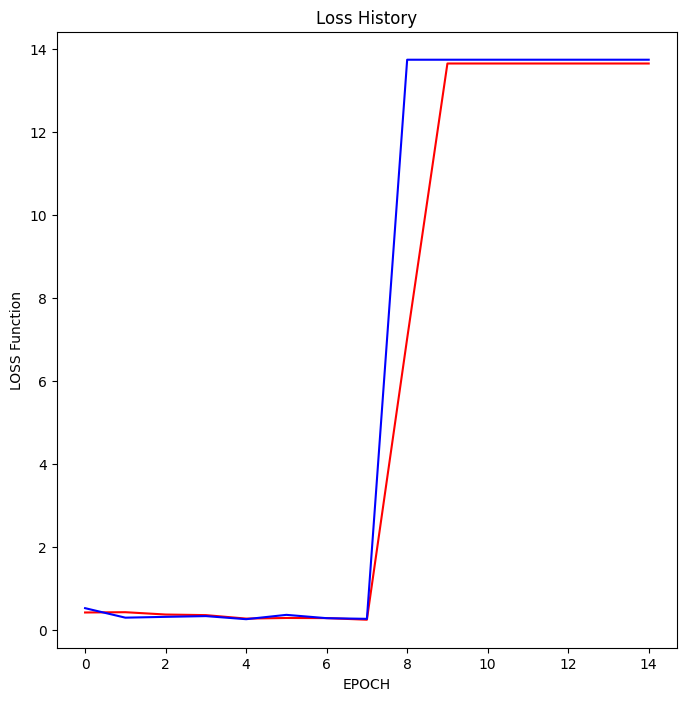

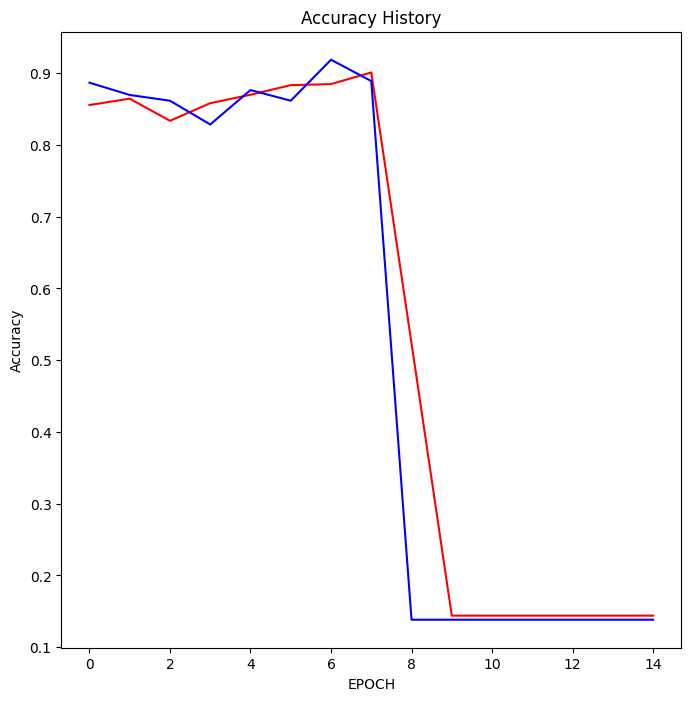

In [5]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='binary_crossentropy')

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)
